## Читаю и рисую траекторию

In [35]:
import os

Icms_path = os.path.abspath("data\\traj.dat")
file = open(Icms_path)

header = file.readline().split()
print(header)
lines = file.readlines()

table = [line.split() for line in lines]
table = list(filter(None, table))

R = [float(row[0]) for row in table]
Z = [float(row[1]) for row in table]
N_traj = [int(row[12]) for row in table]

rays = {}
index = 0
ray = []
for row in table:
    if index != int(row[12]):
         index = int(row[12])
         ray = { 'R' : [], 'Z' : []}
         rays[index] = ray
        # print(index)
    ray['R'].append(float(row[0]))
    ray['Z'].append(float(row[1]))
    #print("append")


#print(rays)

['R', 'Z', 'rho', 'theta', 'N_par', 'N_perp', 'P_tot', 'P_land', 'P_coll', 'P_alph', 'slow=1', 'out=1', 'N_traj']


In [8]:
import matplotlib
import matplotlib.pyplot as plt

<Figure size 2400x1600 with 0 Axes>

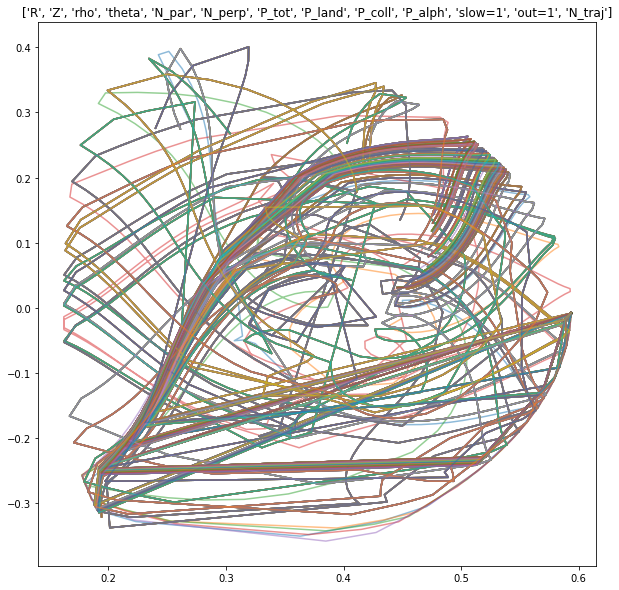

<Figure size 2400x1600 with 0 Axes>

In [46]:

for (n, ray) in rays.items() :
    plt.plot(ray['R'], ray['Z'], alpha=0.5,  antialiased=True);
plt.title(header);
plt.figure(figsize=(12,8), dpi= 200, facecolor='w', edgecolor='k')